# **Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pywt
import sys
sys.path.append("../")
from src.dwt_utils import *
from src.baseline_utils import train_model

# **Dataset Import**

In [2]:
df = pd.read_csv("../datasets/esr_dataset.csv")
df = df.drop("Unnamed", axis=1)
df.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5


In [3]:
# Трансформируем целевую переменную из многоклассовой в бинарную
df['y'] = df['y'].apply(lambda y: 1 if y==1 else 0)
df['y'].value_counts()

y
0    9200
1    2300
Name: count, dtype: int64

In [4]:
# Делим выборку на тренировочную и тестовую
X_train = df.drop('y', axis = 1)
Y_train = df['y']
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# **Discrete Wavelet Transform Feature Extraction & ML**

Для демонстрации принципов работы дискретного вейвлет-преобразования выполним декомозицию выбранного сигнала до 5 уровня

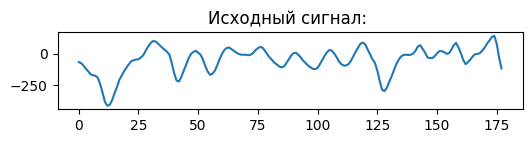

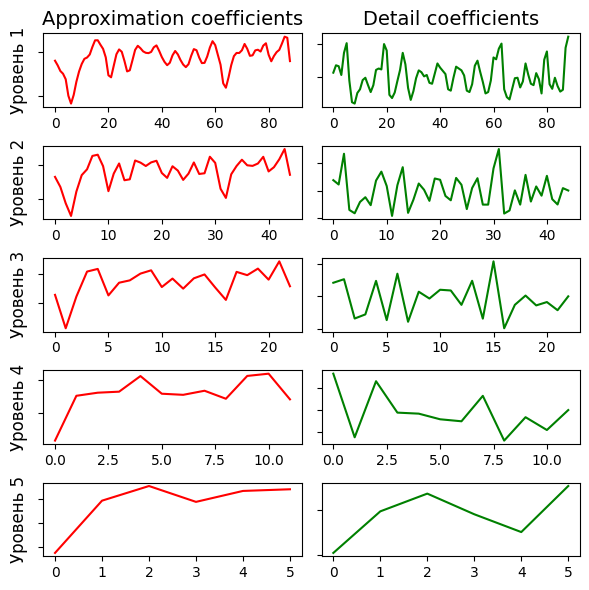

In [5]:
sample_signal = X_train.iloc[0].to_numpy()
decompose_signal_plot(sample_signal)

Трансформируем датасет при помощи дискретного вейвлет-преоразования

In [6]:
X_train_dwt = transfrom_dataset_with_dwt(X_train, wavelet='haar', level=3)
X_test_dwt = transfrom_dataset_with_dwt(X_test,  wavelet='haar', level=3)

Проверим качество классификации

In [7]:
train_model(RandomForestClassifier(), X_train_dwt, Y_train, X_test_dwt, Y_test)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1835
           1       0.95      0.93      0.94       465

    accuracy                           0.98      2300
   macro avg       0.97      0.96      0.96      2300
weighted avg       0.98      0.98      0.98      2300



In [8]:
train_model(SVC(), X_train_dwt, Y_train, X_test_dwt, Y_test)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1835
           1       0.96      0.91      0.93       465

    accuracy                           0.97      2300
   macro avg       0.97      0.95      0.96      2300
weighted avg       0.97      0.97      0.97      2300



In [9]:
train_model(KNeighborsClassifier(), X_train_dwt, Y_train, X_test_dwt, Y_test)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1835
           1       0.99      0.73      0.84       465

    accuracy                           0.94      2300
   macro avg       0.96      0.86      0.90      2300
weighted avg       0.95      0.94      0.94      2300



Бейзлайн сильно улучшить не удалось